# Logistic Regression
SP 18 CSE 5539-0010 "Social Media and Text Analysis" Homework #2  
Alan Ritter, The Ohio State University   

In this assignment, we will walk you through the process of :

- implementing logistic regression from scratch 
- and applying it to a real-world problem that predicts whether a student will be admitted to a university. 


<div class="alert alert-danger">
IMPORTANG: In this assignment, except Numpy and Matplotlib, no other external Python packages are allowed. Scipy is used in gradient checking, though, it is not allowed elsewhere. 
</div>

**Honor Code:** I hereby agree to abide the Ohio State University's Code of Student Conduct, promise that the submitted assignment is my own work, and understand that my code is subject to plagiarism test.

**Signature**: Indrajeet Saravanan

## 0. Importing Numpy and Matplotlib [Code provided - do not change]

In [11]:
import sys

# Check what version of Python is running
print (sys.version)

3.6.4 (default, Mar  9 2018, 23:15:03) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]


You will need to have Numpy installed for the right version of Python. Most likely, you are using Python 3.6 in this Jupyter Notebook; then you may [install Numpy accordingly](https://stackoverflow.com/questions/37933978/install-numpy-in-python-3-4-4-and-linux). For example, installng Numpy via pip by using the command line "sudo python3.4 -m pip install numpy". If failed, you may need to update pip first by "python3.4 -m pip install --upgrade pip".

In [12]:
# Run some setup code for this notebook. Don't modify anything in this cell.

import random
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# reload external python modules;
# http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Visualizing the Data  [Code provided - no need to change]

The provided dataset contains applicants' scores on two exams and the admission decisons. 

[Matplotlib](http://matplotlib.org/users/pyplot_tutorial.html) is a Python package for data visualization. Suppose you are using Python 3.4, you can install by first use command line "brew install freetype", then "sudo python3.4 -m pip install matplotlib". 


# of training examples =  100
# of features =  2


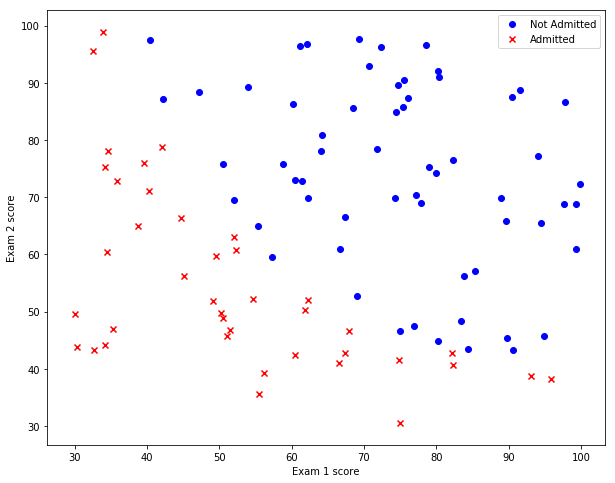

In [13]:
#load the dataset
data = np.loadtxt('hw2_data.txt', delimiter=',')

train_X = data[:, 0:2]
train_y = data[:, 2]

# Get the number of training examples and the number of features
m_samples, n_features = train_X.shape
print ("# of training examples = ", m_samples)
print ("# of features = ", n_features)

pos = np.where(train_y == 1)
neg = np.where(train_y == 0)
plt.scatter(train_X[pos, 0], train_X[pos, 1], marker='o', c='b')
plt.scatter(train_X[neg, 0], train_X[neg, 1], marker='x', c='r')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Not Admitted', 'Admitted'])
plt.show()


## 2. Cost Function [5 points]
You're going to first implement the sigmoid function, then the cost function for (binary) logistic regression. 

In [14]:
def sigmoid(z):
    """ Sigmoid function """
    ###################################################################
    # Compute the sigmoid function for the input here.                #
    ###################################################################
    
    t = np.logaddexp(0,-z)
    s = np.exp(-t)
    return s

# Check your sigmoid implementation
z = np.array([[1, 2], [-1, -2]])
f = sigmoid(z)
print ("=== For autograder ===")
print (f)

=== For autograder ===
[[0.73105858 0.88079708]
 [0.26894142 0.11920292]]


In [15]:
def cost_function(theta, X, y):
    """ The cost function for logistic regression """
    #####################################################################################
    # Compute the cost given the current parameter theta on the training data set (X, y)#
    #####################################################################################
     
    h_value = sigmoid(np.dot(X,theta))    
    m = X.shape[0]
    cost = (-1/m) * np.sum((y * np.log(h_value)) + ((1-y)*np.log(1 - h_value)))    
    return cost

# Check your cost function implementation
t_X = np.array([[1, 2], [-1, -2]])
t_y = np.array([0, 1])
t_theta1 = np.array([-10, 10])
t_theta2 = np.array([10, -10])
t_c1 = cost_function(t_theta1, t_X, t_y)
t_c2 = cost_function(t_theta2, t_X, t_y)
print ("=== For autograder ===")
print (t_c1)
print (t_c2)

=== For autograder ===
10.000045398899701
4.539889921682063e-05


## 3. Gradient Computation [5 points]

Implement the gradient computations for logistic regression. 

In [16]:
def gradient_update(theta, X, y):
    """ The gradient update for logistic regression"""
    ###############################
    # Compute the gradient update #
    ###############################
    
    h_value = sigmoid(np.dot(X,theta))    
    grad = np.dot((h_value -  y), X)
    grad = grad / X.shape[0]
    return grad

# Check your gradient computation implementation
t_X = np.array([[1, 2], [-1, -2]])
t_y = np.array([0, 1])
t_theta1 = np.array([-10, 10])
t_theta2 = np.array([10, -10])
t_g1 = gradient_update(t_theta1, t_X, t_y)
t_g2 = gradient_update(t_theta2, t_X, t_y)
print ("=== For autograder ===")
print (t_g1)
print (t_g2)

=== For autograder ===
[0.9999546 1.9999092]
[4.53978687e-05 9.07957374e-05]


## 4. Gradient Checking [Code provided. Bonus 10 points if implemented from scratch]
You can use the code provided below to check the gradient of your logistic regression functions. Alternatively, you can implementing the gradient checking from scratch by yourself (bonus 10 points). 

[Gradient checking](http://ufldl.stanford.edu/tutorial/supervised/DebuggingGradientChecking/) is an important technique for debugging the gradient computation. Logistic regression is a relatively simple algorithm where it is straightforward to derive and implement its cost function and gradient computation. For more complex models, the gradient computation can be notoriously difficulty to debug and get right. Sometimes a subtly buggy implementation will manage to learn something that can look surprisingly reasonable, while performing less well than a correct implementation. Thus, even with a buggy implementation, it may not at all be apparent that anything is amiss. 

In [17]:
# Check your gradient computation implementation
t_samples, t_features = 100, 10
t_X = np.random.randn(t_samples, t_features)
t_y = np.random.randint(2, size=t_samples) 
t_theta = np.random.randn(t_features)

from scipy import optimize
print ("=== For autograder ===")
print('Output of check_grad: %s' % optimize.check_grad(cost_function, gradient_update, t_theta, t_X, t_y))

=== For autograder ===
Output of check_grad: 7.096396896147862e-08


In [22]:
t_samples, t_features = 100, 10
t_X = np.random.randn(t_samples, t_features)
t_y = np.random.randint(2, size=t_samples) 
t_theta = np.random.randn(t_features)

def gradient_checking(cost_fn, grad_updt, t_theta, t_X, t_y):
    
    epsilon = 1e-4
    lhs = grad_updt(t_theta, t_X, t_y)
    theta_p = t_theta + (np.identity(t_features) * epsilon)
    theta_n = t_theta - (np.identity(t_features) * epsilon)


    for i in range(t_features):

        j_theta_p = cost_fn(theta_p[i,], t_X, t_y)
        j_theta_n = cost_fn(theta_n[i,], t_X, t_y)
        rhs = (j_theta_p - j_theta_n)/(2*epsilon)
        diff = abs(lhs[i,] - rhs)
        if diff > 1e-5:
            print(f'Gradient Check Failed at position : {i}')
            return 'Gradient Check Failed!'
    
    return 'Gradient Check Passed!!!'

gradient_checking(cost_function, gradient_update, t_theta, t_X, t_y)

'Gradient Check Passed!!!'

## 5. Gradient Descent  and Decision Boundary  [15 points]

Implement the batch gradient decent algorithm for logistic regression. For every 25 iteration, also visualize the decision boundary and obeserve how it changes during the training.

[ Iteration 1 ] cost = 0.6693658164197881


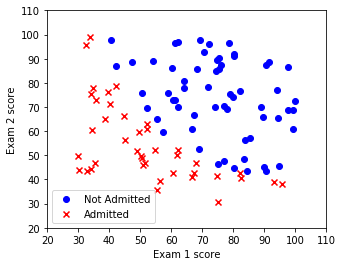

[ Iteration 25 ] cost = 0.5261316452581466


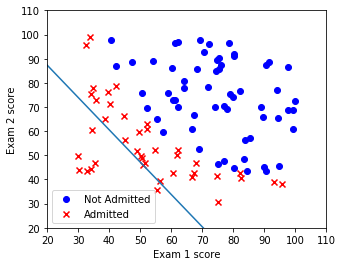

[ Iteration 50 ] cost = 0.4519364564385709


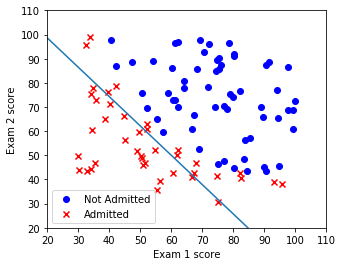

[ Iteration 75 ] cost = 0.404244815060816


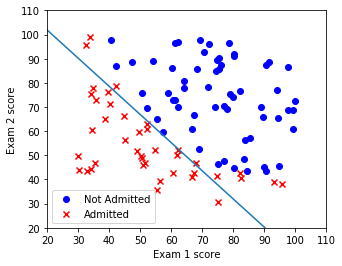

[ Iteration 100 ] cost = 0.37142265699023236


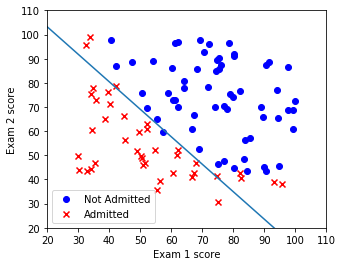

[ Iteration 125 ] cost = 0.34754270900467993


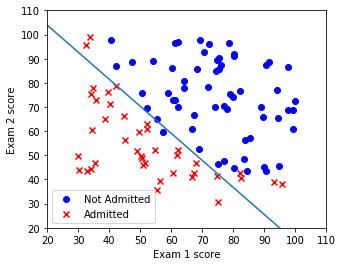

[ Iteration 150 ] cost = 0.3293981441372938


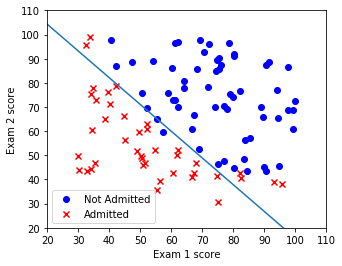

[ Iteration 175 ] cost = 0.31513575753937845


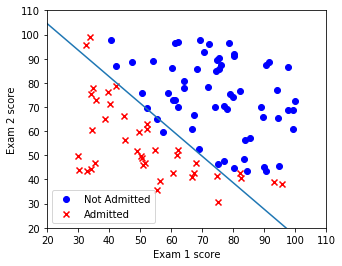

[ Iteration 200 ] cost = 0.30361947184801186


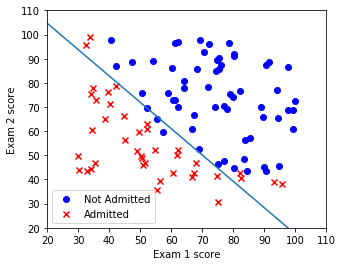

[ Iteration 225 ] cost = 0.2941169838324438


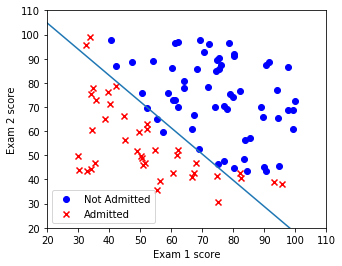

[ Iteration 250 ] cost = 0.2861359123932831


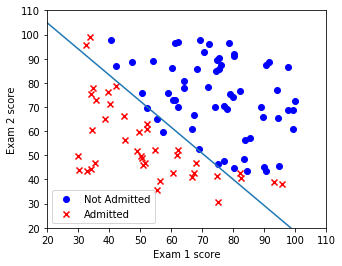

[ Iteration 275 ] cost = 0.27933320935263334


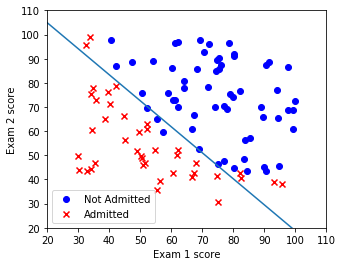

[ Iteration 300 ] cost = 0.2734625474970955


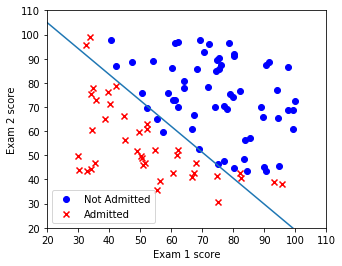

[ Iteration 325 ] cost = 0.26834242489044746


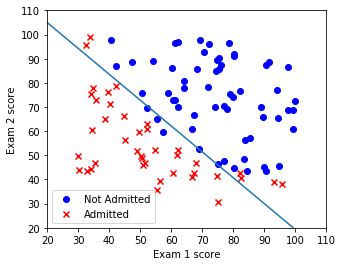

[ Iteration 350 ] cost = 0.26383609228696225


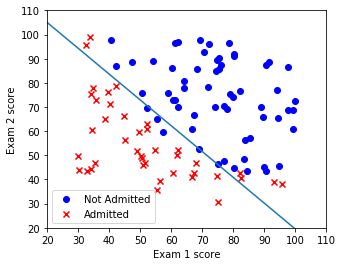

[ Iteration 375 ] cost = 0.25983850221278415


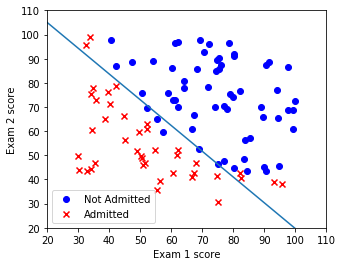

[ Iteration 400 ] cost = 0.2562675770249569


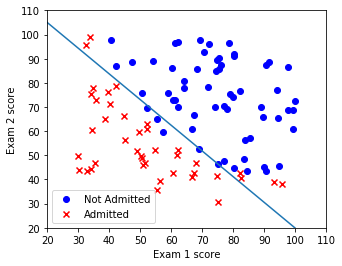

In [19]:
def gradient_descent(theta, X, y, alpha=1e-2, max_iterations=400):
    """ Batch gradient descent algorithm """
    #################################################################
    # Update the parameter 'theta' iteratively to minimize the cost #
    # Also visualize the decision boundary during learning          #
    #################################################################
 
    alpha *= m_samples
    iteration = 0
    
    X_Norm = np.copy(X)
    
    x_max = np.max(X_Norm,0)
    x_min = np.min(X_Norm,0)
    X_Norm = (X - x_min) / (x_max - x_min)
    
    X_Norm = np.insert(X_Norm,0,1,axis = 1)

    while(iteration < max_iterations):
        iteration += 1
        theta -= alpha*gradient_update(theta, X_Norm, y)
      
        # For every 25 iterations
        if iteration % 25 == 0 or iteration == 1:
            cost = 0
            cost = cost_function(theta, X_Norm, y)
            print ("[ Iteration", iteration, "]", "cost =", cost)
            plt.rcParams['figure.figsize'] = (5, 4)
            plt.xlim([20,110])
            plt.ylim([20,110])
            
            pos = np.where(y == 1)
            neg = np.where(y == 0)
            
            plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
            plt.scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
            plt.xlabel('Exam 1 score')
            plt.ylabel('Exam 2 score')
            plt.legend(['Not Admitted', 'Admitted'])
            t = np.arange(10, 100, 0.1)
            
            # Min-Max normalization of t arry using x1's min and max values.
            t_Norm =  (t - x_min[0])/(x_max[0] - x_min[0])
            
            # Calculating the coresponding y coordinates for t_Norm values 
            coor_y = (-theta[0] - (theta[1] * t_Norm)) / theta[2]
            
            # Scaling back coor_y values using x2's min and max values
            coor_y = (coor_y * (x_max[1]-x_min[1])) + x_min[1]
            
            # Plotting the decision boundary
            plt.plot(t,coor_y)
            plt.show()
               
    return theta

initial_theta = np.random.rand(n_features + 1)
learned_theta = gradient_descent(initial_theta, train_X, train_y)

### 6. Predicting [5 points]
Now that you learned the parameters of the model, you can use the model to perdict whether a particular student will be admited. 

In [20]:
def predict(theta, X):
    """ Predict whether the label is 0 or 1 using learned logistic regression parameters """

    X = (X - np.min(train_X,0)) / (np.max(train_X,0) - np.min(train_X,0))
    X = np.insert(X,0,1,axis = 1)
    
    probabilities = sigmoid(np.dot(X,theta))
    predicted_labels = np.zeros(probabilities.shape)
    predicted_labels[np.where(probabilities >= 0.5)] = 1
    
    return probabilities, 1*predicted_labels 

# Check your predication function implementation
t_X1 = [[90, 90]]
t_X2 = [[50, 60]]
t_X3 = [[50, 50]]
print ("=== For autograder ===")
print (predict(learned_theta, t_X1))
print (predict(learned_theta, t_X2))
print (predict(learned_theta, t_X3))

# Computer accuracy on the training dateset 
t_prob, t_label = predict(learned_theta, train_X)
t_precision = t_label[np.where(t_label == train_y)].size / float(train_y.size) * 100
print ("=== For autograder ===")
print('Accuracy on the training set: %s%%' % round(t_precision,2))

=== For autograder ===
(array([0.99529156]), array([1.]))
(array([0.23563508]), array([0.]))
(array([0.1113682]), array([0.]))
=== For autograder ===
Accuracy on the training set: 90.0%
